
# EDA — WFP Food Prices Haiti (2005–2025)

Objectif : réaliser une **analyse exploratoire des données**




## 1. Importations et configuration

In [1]:
import os
import json
import math
import warnings
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

## 2. Chargement des données et inspection initiale

In [2]:
df = pd.read_csv('wfp_food_prices_hti_2025.csv')

In [3]:
df.shape
display(df.head(5))

print("\nColumn:", list(df.columns))

df.shape[0]

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#loc+market+code,#geo+lat,#geo+lon,#item+type,#item+name,#item+code,#item+unit,#item+price+flag,#item+price+type,#currency+code,#value,#value+usd
1,2005-01-15,Artibonite,Gonaives,Gonaives,103,19.45,-72.68,cereals and tubers,Maize meal (local),471,Marmite,actual,Retail,HTG,60,1.41
2,2005-01-15,Artibonite,Gonaives,Gonaives,103,19.45,-72.68,cereals and tubers,Rice (tchako),57,Marmite,actual,Retail,HTG,94,2.21
3,2005-01-15,Artibonite,Gonaives,Gonaives,103,19.45,-72.68,cereals and tubers,Wheat flour (imported),339,Marmite,actual,Retail,HTG,60,1.41
4,2005-01-15,Centre,Hinche,Hinche,104,19.15,-72.02,cereals and tubers,Maize meal (imported),574,Pound,actual,Retail,HTG,13.16,0.31



Column: ['date', 'admin1', 'admin2', 'market', 'market_id', 'latitude', 'longitude', 'category', 'commodity', 'commodity_id', 'unit', 'priceflag', 'pricetype', 'currency', 'price', 'usdprice']


15413

In [4]:
for col in ['price', 'usdprice', 'latitude', 'longitude']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df['date'] = pd.to_datetime(df['date'], errors='coerce')
for col in ['market_id', 'commodity_id']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce', downcast='integer')

# Strip text 
text_cols = ['admin1','admin2','market','category','commodity','unit','priceflag','pricetype','currency']
for c in text_cols:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip()


df = df.drop_duplicates()



## 4. Qualité de la donnée

In [5]:
na_rate = df.isna().mean().sort_values(ascending=False).rename('na_rate')
display((na_rate*100).round(2).to_frame())


df.dtypes

,na_rate
date,0.01
market_id,0.01
latitude,0.01
longitude,0.01
commodity_id,0.01
price,0.01
usdprice,0.01
admin1,0.00
admin2,0.00
market,0.00


date            datetime64[ns]
admin1                  object
admin2                  object
market                  object
market_id              float64
latitude               float64
longitude              float64
category                object
commodity               object
commodity_id           float64
unit                    object
priceflag               object
pricetype               object
currency                object
price                  float64
usdprice               float64
dtype: object

In [13]:
# Stats
display(df[['price','usdprice','latitude','longitude']].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]))

# Analyse 
for c in ['category','commodity','unit','currency','pricetype','priceflag','admin1','market']:
    if c in df.columns:
        vc = df[c].value_counts(dropna=False).head(10)
        print(f"\nTop modalités pour {c}:")
        display(vc)

,price,usdprice,latitude,longitude
count,15412.000000,15412.000000,15412.000000,15412.000000
mean,264.160604,3.115601,18.976405,-72.691466
std,342.870603,2.814973,0.615003,0.753501
min,6.750000,0.160000,18.200000,-74.160000
1%,12.000000,0.280000,18.200000,-74.080000
5%,16.800000,0.370000,18.200000,-74.080000
25%,43.697500,0.880000,18.540000,-72.830000
50%,120.000000,2.230000,19.150000,-72.530000
75%,350.000000,4.580000,19.550000,-72.200000
95%,1000.000000,8.364500,19.940000,-71.730000



Top modalités pour category:


category
cereals and tubers       10476
pulses and nuts           3033
oil and fats              1082
miscellaneous food         779
vegetables and fruits       42
#item+type                   1
Name: count, dtype: int64


Top modalités pour commodity:


commodity
Wheat flour (imported)       1920
Maize meal (local)           1897
Beans (black)                1577
Sorghum                      1559
Rice (tchako)                1525
Beans (red)                  1453
Rice (local)                 1326
Maize meal (imported)        1133
Oil (vegetable, imported)    1082
Sugar (white)                 779
Name: count, dtype: int64


Top modalités pour unit:


unit
Marmite    9585
Pound      4137
Gallon     1082
350 G       563
4 pcs        14
3 pcs        11
Dozen         5
Unit          4
Packet        4
10 pcs        4
Name: count, dtype: int64


Top modalités pour currency:


currency
HTG               15412
#currency+code        1
Name: count, dtype: int64


Top modalités pour pricetype:


pricetype
Retail              15412
#item+price+type        1
Name: count, dtype: int64


Top modalités pour priceflag:


priceflag
actual              15412
#item+price+flag        1
Name: count, dtype: int64


Top modalités pour admin1:


admin1
West           2106
Centre         1932
Grande'Anse    1920
North          1918
South-East     1860
South          1792
North-East     1464
Artibonite     1276
North-West     1144
#adm1+name        1
Name: count, dtype: int64


Top modalités pour market:


market
Port-au-Prince       2106
Hinche               1932
Cap-Haitien          1918
Jeremie              1869
Jacmel               1860
Cayes                1792
Ouanaminthe          1464
Gonaives             1276
Port-de-Paix         1144
Marche de Jeremie      20
Name: count, dtype: int64

## 4.Analyse des distributions


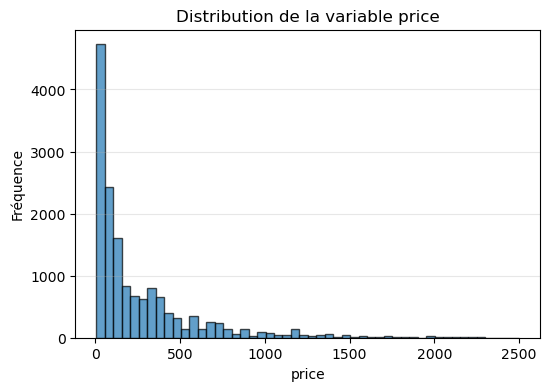

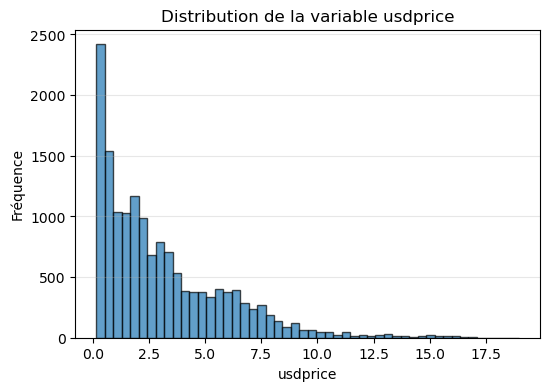

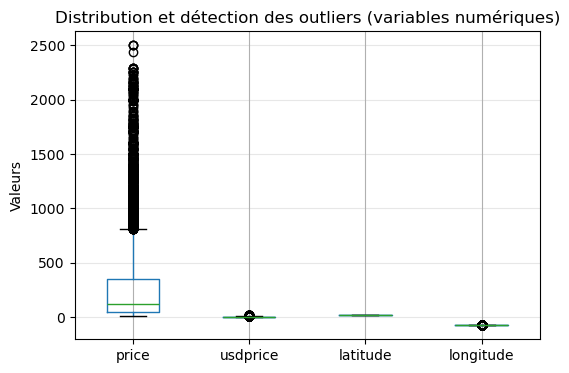

In [6]:
# Histogrammes des variables de prix 
for col in ['price', 'usdprice']:
    if col in df.columns and df[col].notna().any():
        plt.figure(figsize=(6, 4))
        df[col].plot(
            kind='hist', 
            bins=50, 
            edgecolor='black', 
            alpha=0.7, 
            title=f"Distribution de la variable {col}"
        )
        plt.xlabel(col)
        plt.ylabel("Fréquence")
        plt.grid(axis='y', alpha=0.3)


#détecter outliers

num_cols = [c for c in ['price', 'usdprice', 'latitude', 'longitude'] if c in df.columns]

if num_cols:
    plt.figure(figsize=(6, 4))
    df[num_cols].boxplot()
    plt.title("Distribution et détection des outliers (variables numériques)")
    plt.ylabel("Valeurs")
    plt.grid(axis='y', alpha=0.3)
    plt.show()

## 5. Préparation ML

In [22]:
#Extraction des composantes temporelles 

if 'date' in df.columns:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['quarter'] = df['date'].dt.quarter

#Sélection des cibles possibles pour le modèle 
# On garde en priorité 'usdprice'  s'il existe,
# sinon on utilisera 'price' (prix en gourdes).
target_candidates = [col for col in ['usdprice', 'price'] if col in df.columns]
print("Variables cibles potentielles pour la modélisation :", target_candidates)


# Chaque colonne de type texte est convertie en code numérique. Cela facilite l'utilisation par les modèles ML qui n'acceptent pas les chaînes de caractères.
for col in ['commodity', 'unit', 'market', 'admin1', 'pricetype']:
    if col in df.columns:
        df[col + '_id'] = df[col].astype('category').cat.codes

df.head(3)

Variables cibles potentielles pour la modélisation : ['usdprice', 'price']


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,...,pricetype,currency,price,usdprice,year,month,quarter,unit_id,admin1_id,pricetype_id
0,NaT,#adm1+name,#adm2+name,#loc+market+name,0,NaN,NaN,#item+type,#item+name,0,...,#item+price+type,#currency+code,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2005-01-15,Artibonite,Gonaives,Gonaives,3,19.45,-72.68,cereals and tubers,Maize meal (local),16,...,Retail,HTG,60.0,1.41,2005.0,1.0,1.0,9,1,1
2,2005-01-15,Artibonite,Gonaives,Gonaives,3,19.45,-72.68,cereals and tubers,Rice (tchako),28,...,Retail,HTG,94.0,2.21,2005.0,1.0,1.0,9,1,1


In [23]:
##  Tendances temporelles globales 

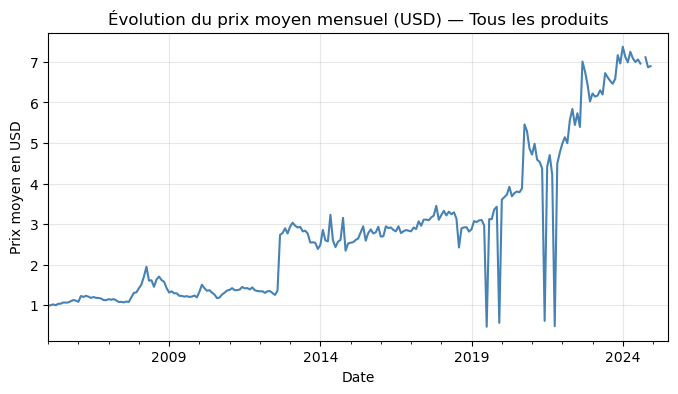

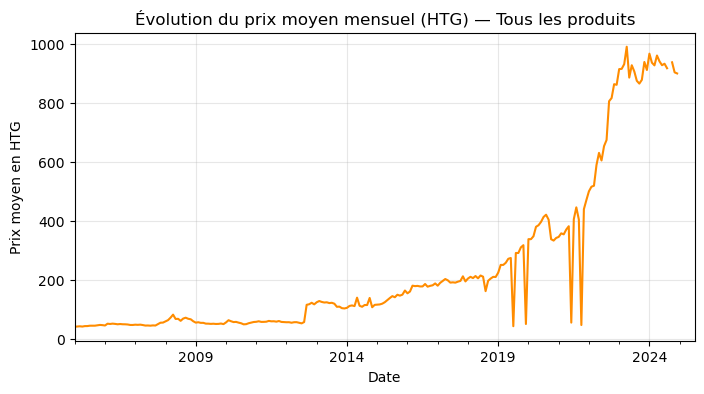

In [7]:
# Vérification et tri chronologique
if 'date' in df.columns:
    df = df.sort_values('date')

    # Évolution du prix moyen mensuel en USD 
    if 'usdprice' in df.columns:
        ts_usd = (
            df.set_index('date')['usdprice']
              .resample('MS')   # MS = début de mois
              .mean()
        )
        plt.figure(figsize=(8, 4))
        ts_usd.plot(color='steelblue', title="Évolution du prix moyen mensuel (USD) — Tous les produits")
        plt.xlabel("Date")
        plt.ylabel("Prix moyen en USD")
        plt.grid(alpha=0.3)
        plt.show()

    #Évolution  prix moyen mensuel en HTG 
    if 'price' in df.columns:
        ts_htg = (
            df.set_index('date')['price']
              .resample('MS')
              .mean()
        )
        plt.figure(figsize=(8, 4))
        ts_htg.plot(color='darkorange', title="Évolution du prix moyen mensuel (HTG) — Tous les produits")
        plt.xlabel("Date")
        plt.ylabel("Prix moyen en HTG")
        plt.grid(alpha=0.3)
        plt.show()

In [26]:
#Comparaisons région, produit et marché - HTG

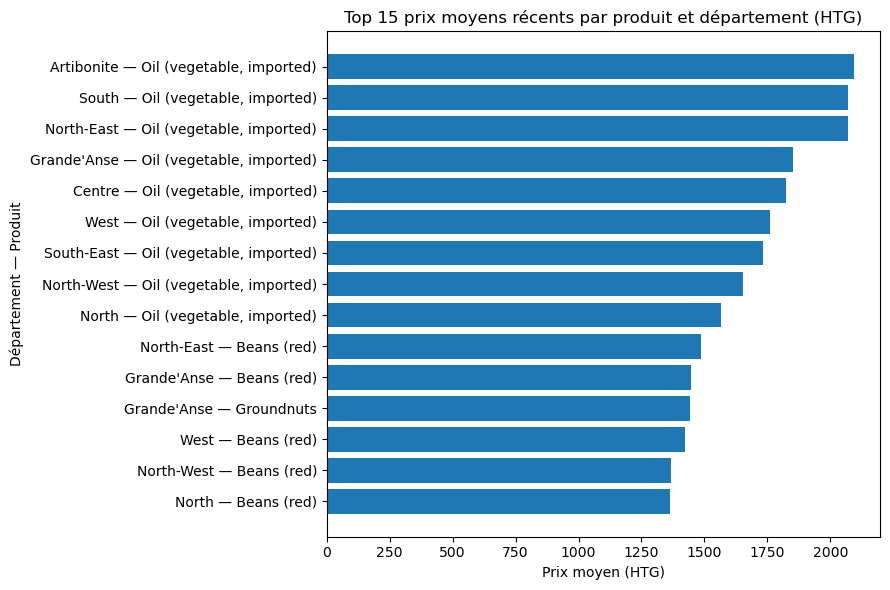

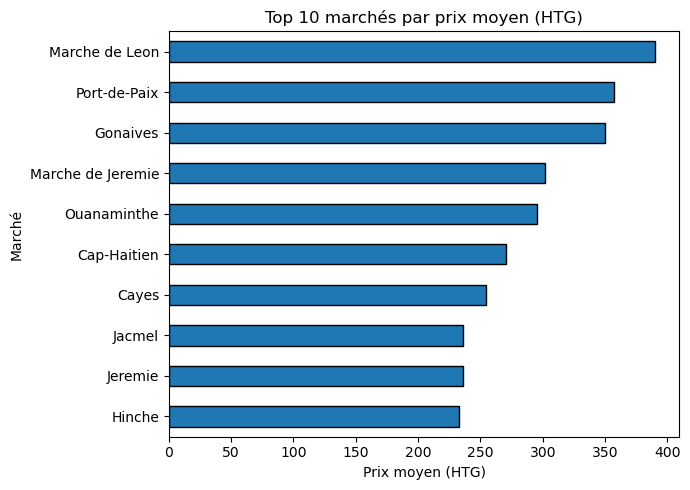

In [8]:
val = 'price' if 'price' in df.columns else 'usdprice'
cur = 'HTG' if val == 'price' else 'USD'

if 'date' in df.columns:
    y = df['date'].dt.year
    recent = y.max()
    sub = df[y >= recent-2]
else:
    sub = df

# Top 15 produit par département
top_prod = (sub.groupby(['admin1','commodity'])[val]
              .mean().reset_index()
              .sort_values(val, ascending=False)
              .head(15))
plt.figure(figsize=(9,6))
plt.barh(top_prod['admin1'] + ' — ' + top_prod['commodity'], top_prod[val])
plt.title(f"Top 15 prix moyens récents par produit et département ({cur})")
plt.xlabel(f"Prix moyen ({cur})"); plt.ylabel("Département — Produit")
plt.gca().invert_yaxis(); plt.tight_layout(); plt.show()

# Top 10 marchés
top_mkt = (df.groupby('market')[val].mean()
             .nlargest(10).sort_values())
plt.figure(figsize=(7,5))
top_mkt.plot(kind='barh', edgecolor='black', legend=False)
plt.title(f"Top 10 marchés par prix moyen ({cur})")
plt.xlabel(f"Prix moyen ({cur})"); plt.ylabel("Marché")
plt.tight_layout(); plt.show()

In [28]:
##Ajouter une colonne “origine” (local vs importé)

In [9]:
# Définition des catégories (à adapter selon ton connaissance du marché haïtien)
local_products = [
    'Maize meal (local)', 'Cassava', 'Yam', 'Plantain', 'Sweet potato',
    'Beans (local)', 'Banana', 'Groundnut', 'Sugar (local)'
]
imported_products = [
    'Rice (imported)', 'Rice (tchako)', 'Wheat flour (imported)',
    'Oil (vegetable, imported)', 'Milk powder', 'Rice (imported, USA)'
]

# Création d’une colonne "origin"
df['origin'] = df['commodity'].apply(
    lambda x: 'Local' if x in local_products
    else 'Importé' if x in imported_products
    else 'Inconnu'
)
df.head()

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,origin
1,2005-01-15,Artibonite,Gonaives,Gonaives,103.0,19.45,-72.68,cereals and tubers,Maize meal (local),471.0,Marmite,actual,Retail,HTG,60.0,1.41,Local
26,2005-01-15,North-West,Port-de-Paix,Port-de-Paix,110.0,19.94,-72.83,cereals and tubers,Maize meal (local),471.0,Marmite,actual,Retail,HTG,55.0,1.29,Local
27,2005-01-15,North-West,Port-de-Paix,Port-de-Paix,110.0,19.94,-72.83,cereals and tubers,Rice (tchako),57.0,Marmite,actual,Retail,HTG,78.0,1.84,Importé
28,2005-01-15,North-West,Port-de-Paix,Port-de-Paix,110.0,19.94,-72.83,cereals and tubers,Wheat flour (imported),339.0,Marmite,actual,Retail,HTG,60.0,1.41,Importé
29,2005-01-15,South,Les Cayes,Cayes,102.0,18.20,-73.75,cereals and tubers,Maize meal (imported),574.0,Pound,actual,Retail,HTG,14.4,0.34,Inconnu


In [33]:
##Comparer les prix moyens (HTG prioritaire)

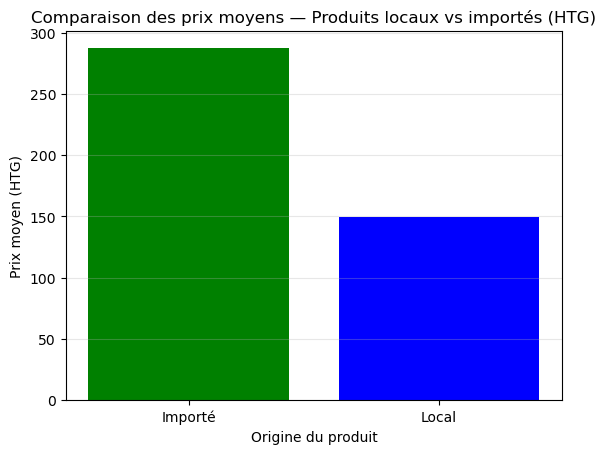

In [10]:
val = 'price' if 'price' in df.columns else 'usdprice'
cur = 'HTG' if val == 'price' else 'USD'

avg_origin = (
    df[df['origin'] != 'Inconnu']
    .groupby('origin')[val]
    .mean()
    .reset_index()
)

plt.bar(avg_origin['origin'], avg_origin[val], color=['green','blue'])
plt.title(f"Comparaison des prix moyens — Produits locaux vs importés ({cur})")
plt.xlabel("Origine du produit")
plt.ylabel(f"Prix moyen ({cur})")
plt.grid(axis='y', alpha=0.3)
plt.show()

In [37]:
##Comparer la disponibilité (nombre de marchés couverts)


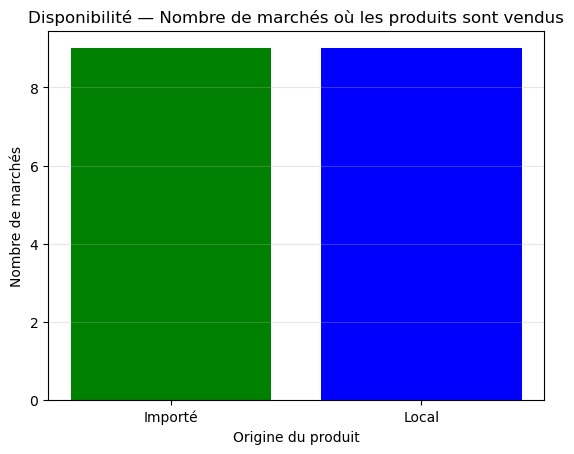

In [11]:
availability = (
    df[df['origin'] != 'Inconnu']
    .groupby('origin')['market']
    .nunique()
    .reset_index()
    .rename(columns={'market': 'nb_marches'})
)

plt.bar(availability['origin'], availability['nb_marches'], color=['green','blue'])
plt.title("Disponibilité — Nombre de marchés où les produits sont vendus")
plt.xlabel("Origine du produit")
plt.ylabel("Nombre de marchés")
plt.grid(axis='y', alpha=0.3)
plt.show()

In [41]:
## Analyse bivariée et corrélations

,price,latitude,longitude,commodity_id,market_id
price,1.000,0.089,0.011,-0.223,0.002
latitude,0.089,1.000,0.489,0.059,-0.034
longitude,0.011,0.489,1.000,0.087,-0.104
commodity_id,-0.223,0.059,0.087,1.000,0.118
market_id,0.002,-0.034,-0.104,0.118,1.000


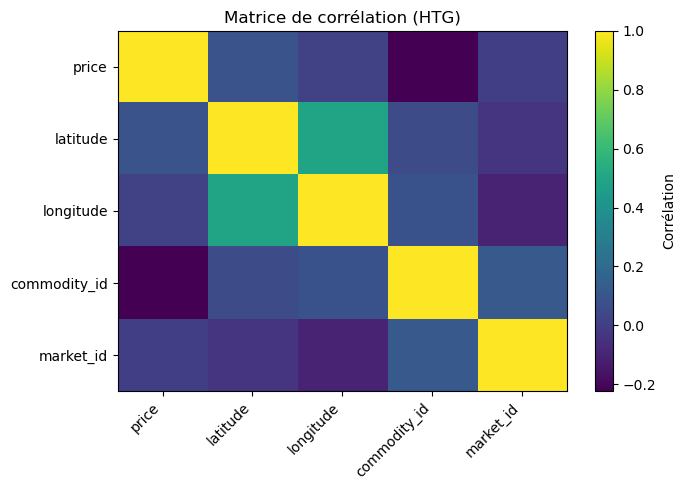

In [12]:
# --- Sélection de la devise prioritaire ---
val = 'price' if 'price' in df.columns else 'usdprice'
cur = 'HTG' if val == 'price' else 'USD'

# --- Matrice de corrélation ---
num_cols = [c for c in [val, 'latitude', 'longitude', 'year', 'month', 'quarter',
                        'commodity_id', 'market_id'] if c in df.columns]
corr = df[num_cols].corr(numeric_only=True)
display(corr.round(3))

plt.figure(figsize=(7, 5))
plt.imshow(corr, cmap='viridis', aspect='auto')
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha='right')
plt.yticks(range(len(num_cols)), num_cols)
plt.colorbar(label='Corrélation')
plt.title(f"Matrice de corrélation ({cur})")
plt.tight_layout()
plt.show()

# --- Saisonnalité : prix moyen par mois ---
if {'month', val}.issubset(df.columns):
    by_month = df.groupby('month')[val].mean()
    plt.figure(figsize=(6, 4))
    by_month.plot(kind='bar', color='teal', edgecolor='black',
                  title=f"Saisonnalité : prix moyen par mois ({cur})")
    plt.xlabel("Mois")
    plt.ylabel(f"Prix moyen ({cur})")
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()


In [44]:
##Détection simple d'outliers

In [13]:
def iqr_outlier_bounds(s: pd.Series):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    return q1 - 1.5 * iqr, q3 + 1.5 * iqr

# --- Utilisation de la devise prioritaire ---
col = 'price' if 'price' in df.columns else 'usdprice'
cur = 'HTG' if col == 'price' else 'USD'

if col in df.columns and df[col].notna().any():
    low, high = iqr_outlier_bounds(df[col].dropna())
    rate = ((df[col] < low) | (df[col] > high)).mean() * 100
    print(f"{col} ({cur}) : bornes IQR = ({low:.2f}, {high:.2f}) | ≈ {rate:.2f}% d'outliers")

price (HTG) : bornes IQR = (-415.76, 809.45) | ≈ 6.92% d'outliers
